In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def genera_sinusoide_ms(ampiezza, frequenza, fase, istante_iniziale, istante_finale, deltaT, y_inizio):
    # Controlla se i valori massimo e minimo della sinusoide rimangono entro i limiti di 0 e 100
    if y_inizio + ampiezza > 100 or y_inizio - ampiezza < 0:
        print(f"Errore: con y_inizio={y_inizio} e ampiezza={ampiezza}, i valori della sinusoide eccederebbero i limiti di 0 e 100.")
        return None, None
    
    # Converte gli istanti di tempo da millisecondi a secondi
    istante_iniziale = istante_iniziale / 1000
    istante_finale = istante_finale / 1000
    
    # Genera un array di tempi da 'istante_iniziale' a 'istante_finale' con intervalli di deltaT
    t = np.arange(istante_iniziale, istante_finale, deltaT)
    
    # Calcola i valori della sinusoide
    y = ampiezza * np.sin(2 * np.pi * frequenza * t + fase) + y_inizio 
    
    return t * 1000, y  # Convertiamo t nuovamente in millisecondi per la visualizzazione

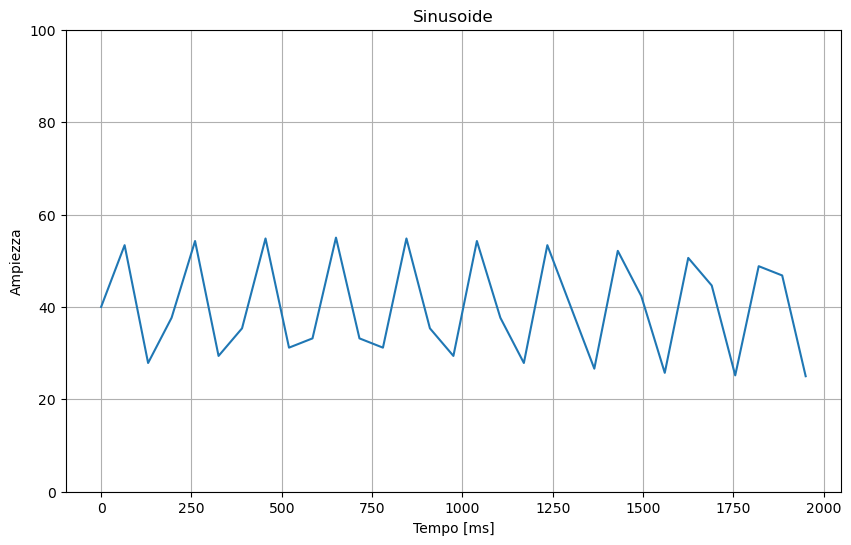

In [11]:
# Parametri della sinusoide
ampiezza = 15          # Ampiezza della sinusoide 
frequenza = 5           # Frequenza in Hz
fase = 0              # Fase in radianti
istante_iniziale_ms = 0 # Tempo di inizio in millisecondi
istante_finale_ms = 2000 # Tempo di fine in millisecondi
deltaT = 0.065          # Periodo di campionamento in secondi (intervallo tra un campione e l'altro)
# La frequenza di campionamento è (1/deltaT) e si misura in Hz
# 65ms di periodo di campionamento sono circa 15/16 Hz
y_inizio = 40           # Punto di inizio sull'asse y

# Genera la sinusoide
t, y = genera_sinusoide_ms(ampiezza, frequenza, fase, istante_iniziale_ms, istante_finale_ms, deltaT, y_inizio)

# Verifica se la sinusoide è stata generata correttamente prima di tentare di visualizzarla
if t is not None and y is not None:
    plt.figure(figsize=(10, 6))
    # Visualizza la sinusoide
    plt.plot(t, y)
    plt.title('Sinusoide')
    plt.xlabel('Tempo [ms]')
    plt.ylabel('Ampiezza')
    plt.ylim(0, 100)  # Limita l'asse y tra 0 e 100
    plt.grid(True)
    plt.show()

In [15]:
# t è un array di valori che rappresentano il tempo, misurato in millisecondi.
print(t)

In [ ]:
# y è un array di valori che rappresentano l'ampiezza della sinusoide in corrispondenza di ciascun istante di tempo t
print(y)